<a href="https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/main/2022/week5/regression_exercise_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Here we will examine if we can predict the price of a houses in Iowa given some of the house features.

## Loading the data

Read the data file into a Pandas DataFrame called `home_data`.

In [4]:
import pandas as pd

# Path of the file to read
#https://github.com/michalis0/DataMining_and_MachineLearning_private/tree/main/2021/week4/data/housing-prices-dataset
data_path = "https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/week5/data/housing-prices-dataset/train.csv"
home_data = pd.read_csv(data_path)

print("Setup Complete")
home_data.head()

Setup Complete


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Here you can find a brief description of the features.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RìoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## Feature split and Test train split

Select the **features** which by convention are called **X**. We will also choose the target variable which we typically call `y`. As regressor, use ONLY the feature 1stFlrSF which identified the number square feet of the first floor 

In [82]:
feature_names = ['1stFlrSF']
X = home_data[feature_names]
y = home_data["SalePrice"]

In [83]:
X.head()

,1stFlrSF
0,856
1,1262
2,920
3,961
4,1145


In [84]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

Now, do the test-trainsplit, using as train 80% of the data and random state 42

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

## Linear regression

Now, create the linear model. Train it with the train set and use the model to make predictions on the test set. Which accuracy do you achieve on the test set?

In [86]:
# do the right imports
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# Fit the model
model.fit(X_train,y_train)

LinearRegression()

and we do the predictions:

In [87]:
predictions = model.predict(X_test)

What are the model's $MAE$ and $R^2$ ?

In [88]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MAE %.2f" % mae)
print("R^2 %.2f" % r2)

MAE 47731.15
R^2 0.43


and we can plot the data and the regression.

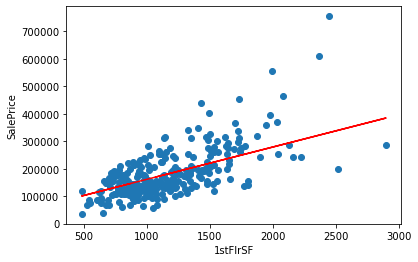

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_test.iloc[:,0], y_test)
plt.plot(X_test.iloc[:,0], predictions, 'r')
plt.xlabel(X_test.columns[0])
plt.ylabel('SalePrice')
plt.show()

## Predict a new datapoint

Predict what would be the price of a house with 1000 square feet at the first floor.

In [98]:
import numpy as np
vals = [1000]

new_datapoint=pd.DataFrame(vals, columns = X_train.columns)

# this is the predicted value from the model
y_pred = model.predict(new_datapoint)[0]

print(f"The predicted price is {y_pred:.2f}")



The predicted value is 161547.81


## One hot encoding

Now do the one hot encoding for the feature "FullBath". Then, create another regression model with the new set of regressors and check if performances (MAE and R^2) changed. When doing the split, keep test-train 20-80 and random state 42.

In [115]:
feature_names = ['1stFlrSF', "FullBath"]
X = home_data[feature_names].copy()

In [116]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
transformed = ohe.fit_transform(X[["FullBath"]])

X[ohe.categories_[0]] = transformed.toarray()

X=X.drop(columns=["FullBath", 0])

X.rename(columns={1: "0", 2: "2", 3:"3"})




,1stFlrSF,0,2,3
0,856,0.0,1.0,0.0
1,1262,0.0,1.0,0.0
2,920,0.0,1.0,0.0
3,961,1.0,0.0,0.0
4,1145,0.0,1.0,0.0
...,...,...,...,...
1455,953,0.0,1.0,0.0
1456,2073,0.0,1.0,0.0
1457,1188,0.0,1.0,0.0
1458,1078,1.0,0.0,0.0


In [117]:
X_train, X_test, y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MAE %.2f" % mae)
print("R^2 %.2f" % r2)

MAE 38912.27
R^2 0.54


## Scaling features

Now, scale the feature "1stFlrSF" using a standard scaler. Then, train the model again and see if the performances changed.

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
num_cols = ["1stFlrSF"]
scaler = StandardScaler()
preprocessor=ColumnTransformer([("standardization", scaler, num_cols)], remainder="passthrough")


In [75]:
encodedX_train = preprocessor.fit_transform(X_train) #it outputs a numpy array
encodedX_train = pd.DataFrame(encodedX_train, columns = X_train.columns)
encodedX_train.head()

,1stFlrSF
0,0.374235
1,-0.958202
2,-0.965964
3,-0.487321
4,-0.370895


In [76]:
encodedX_test=preprocessor.transform(X_test)
encodedX_test=pd.DataFrame(encodedX_test, columns=X_test.columns)
encodedX_test.head()

,1stFlrSF
0,-0.262230
1,0.855465
2,-0.365720
3,-0.427814
4,1.165936


In [77]:
model = LinearRegression()
model.fit(encodedX_train,y_train)
predictions = model.predict(encodedX_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MAE %.2f" % mae)
print("R^2 %.2f" % r2)

MAE 47731.15
R^2 0.43


## Adjusted R^2

The solutions of R^2 will be released after the deadline of the assignment since it would reveal the complete solution. Anyway, we'll see the steps for the last questions, but instead of using the adjusted r^2 we use the r^2 here.

Compute the R^2 building the following models:
- Using only the dummy variables for FullBath (non-scaled)
- Using only 1stFlrSF, scaled

In [111]:
#First model
feature_names = ["FullBath"]
X = home_data[feature_names].copy()

ohe = OneHotEncoder()
transformed = ohe.fit_transform(X[["FullBath"]])

X[ohe.categories_[0]] = transformed.toarray()

X=X.drop(columns=["FullBath", 0])

y = home_data["SalePrice"]
    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)
print("R^2 %.2f" % r2)

R^2 0.35


In [105]:
#Second model

feature_names = ['1stFlrSF']
X = home_data[feature_names]
y = home_data["SalePrice"]
    
preprocessor = ColumnTransformer([('standardization', scaler, feature_names)], remainder='passthrough')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
encodedX_train = preprocessor.fit_transform(X_train)
encodedX_test = preprocessor.transform(X_test)

model = LinearRegression()
model.fit(encodedX_train,y_train)
predictions = model.predict(encodedX_test)

r2 = r2_score(y_test, predictions)
print("R^2 %.2f" % r2)

R^2 0.43
